# **The Sparks Foundation - Data Science and Business Analytics**

## **Prediction using Supervised ML**

In this section we will predict the percentage of a student based on the number of study hours. This task involves 2 variables and is a simple Linear Regression task. We have to predict the score if a student studies for 9.25 hr/day.


## Author: Laksh Jiwani


### Step 1: Processing the data

In [2]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as sns

In [3]:
data = pd.read_csv("C:/Users/Laksh Jiwani/Pictures/Task 1/student_scores - student_scores.csv")
data

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


In [4]:
data.head()

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


In [5]:
data.shape

(25, 2)

In [13]:
data.describe()

,Hours,Scores
count,25.000000,25.000000
mean,5.012000,51.480000
std,2.525094,25.286887
min,1.100000,17.000000
25%,2.700000,30.000000
50%,4.800000,47.000000
75%,7.400000,75.000000
max,9.200000,95.000000




### Mean average of study hours is 5 hrs, minimum study is 1 hr whereas maximum study hours are 9 hrs.

#### Mean average of score is 51%, minimum score is 17% whereas maximum score is 95%

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Hours   25 non-null     float64
 1   Scores  25 non-null     int64  
dtypes: float64(1), int64(1)
memory usage: 528.0 bytes


In [8]:
data.isnull().sum()

Hours     0
Scores    0
dtype: int64



#### There are no missing values in dataset. So, we move forward to our next step.



## Step 2: Visualizing the data.



#### To check the relationship between the two variables in Linear Regression

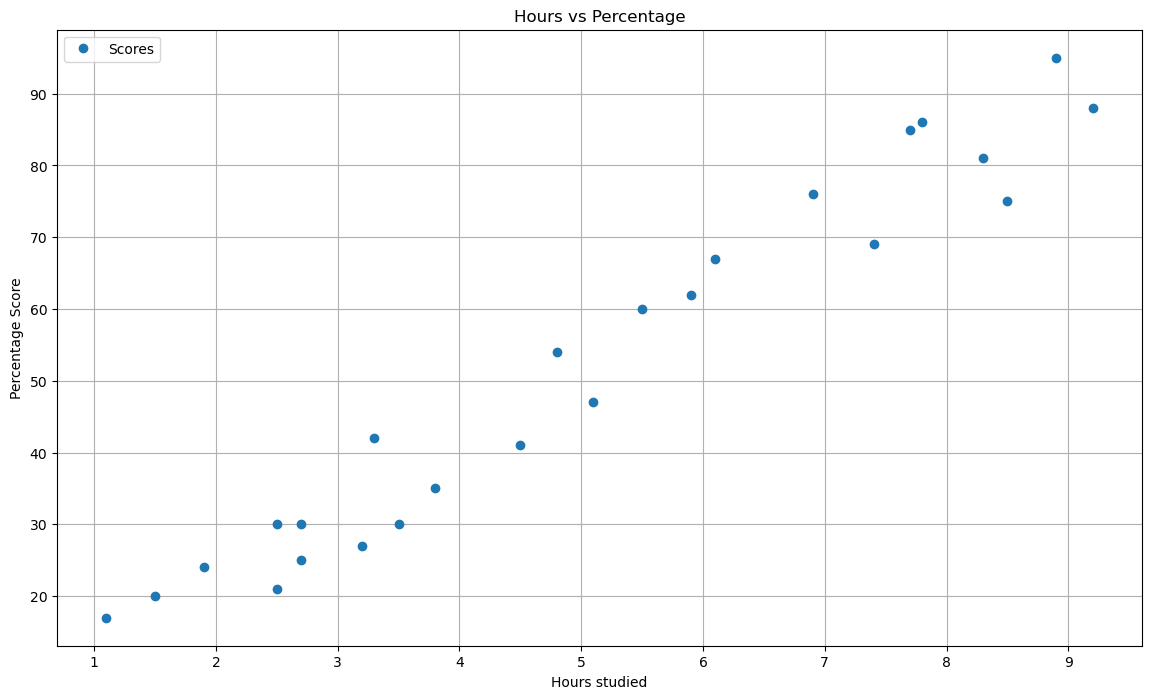

In [15]:
data.plot(x = "Hours", y = "Scores", style = "o")
plt.title("Hours vs Percentage")
plt.xlabel("Hours studied")
plt.ylabel("Percentage Score")
plt.grid()
plt.show()

#### From the above graph, we can clearly see that there is a Positive Linear Relation between the Number of Hours studied and Percentage of Score.


## Step 3: Data Preparation.

Dividing the data into attributes and labels

In [16]:
x = data.iloc[:, :-1].values
y = data.iloc[:, 1].values

Splitting this data into training and test sets. We'll do this by using Scikit-Learn's built-in train_test_split() method:

In [18]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

## Step 4: Training the Algorithm

Here, we will be using the Linear Regression.

In [19]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(x_train, y_train)
print("Training completed.")

Training completed.






After that, we plot the regression line alongwith the scatter graph for the test data.

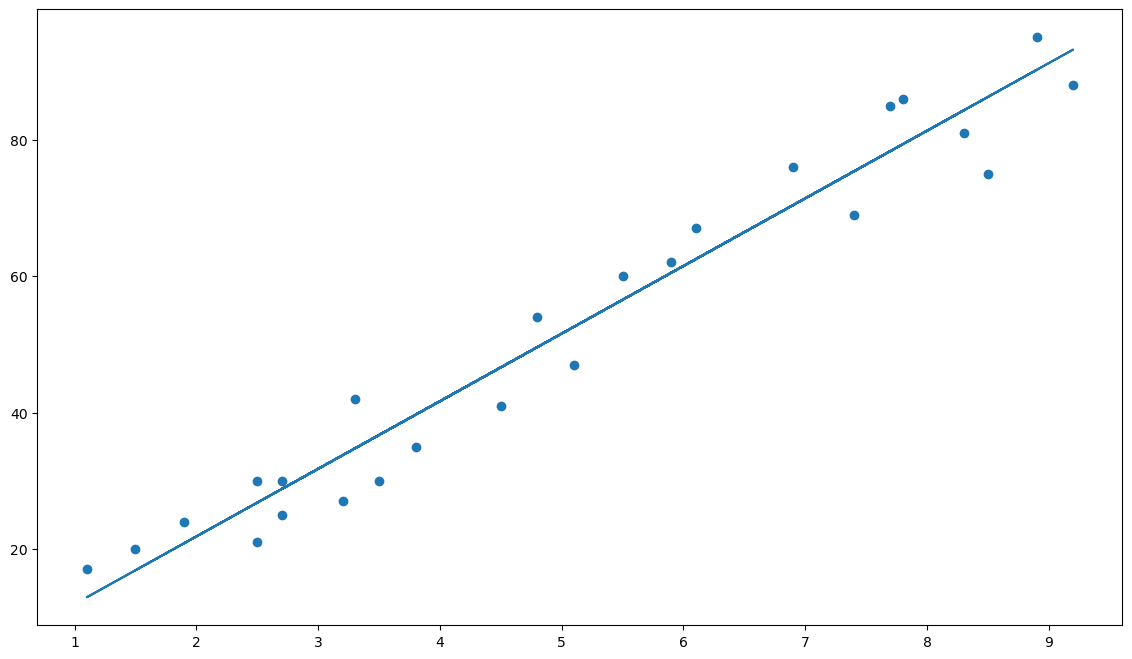

In [20]:
# Plotting the regression line
line = regressor.coef_*x+regressor.intercept_

# Plotting for the test data
plt.scatter(x, y)
plt.plot(x, line)
plt.show()

## Step 5: Making Predictions

Making some predictions to test our model with testing data

In [21]:
print(x_test) # Testing data - in hours
y_pred = regressor.predict(x_test) # Predicting the scores

[[1.5]
 [3.2]
 [7.4]
 [2.5]
 [5.9]]


In [22]:
# Comparison of Actual vs Predicted values
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df

,Actual,Predicted
0,20,16.884145
1,27,33.732261
2,69,75.357018
3,30,26.794801
4,62,60.491033


In [25]:
# Testing with the given data and constraints.
hours = 9.25
test = np.array([hours])
test = test.reshape(-1,1)
own_pred = regressor.predict(test)
print("No of Hours = {}".format(hours))
print("Predicted Score = {}".format(own_pred[0]))

No of Hours = 9.25
Predicted Score = 93.69173248737539


## Step 6: Evaluating the model

The final step is to evaluate the performance of algorithm. This step is particularly important to compare how well different algorithms perform on a particular dataset. For simplicity here, we have chosen the mean square error. There are many such metrics.

In [27]:
from sklearn import metrics
print("Mean Absolute Error is", metrics.mean_absolute_error(y_test, y_pred))
print("Mean Sqaured Error is", metrics.mean_squared_error(y_test, y_pred))

Mean Absolute Error is 4.183859899002982
Mean Sqaured Error is 21.598769307217456
